- https://www.kaggle.com/c/titanic
- Kaggle의 Titanic 문제를 Linear Regression을 이용하여 예측한다.
- 문제의 정의 : 타이타닉호에서 생존자의 조건을 찾고 예측하기를 원한다. 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)

train_data = pd.read_csv("./input/train.csv")
test_data = pd.read_csv("./input/test.csv")

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print train_data["Age"].isnull().sum()
print train_data["SibSp"].isnull().sum()
print train_data["Parch"].isnull().sum()
print train_data["Fare"].isnull().sum()
print train_data["Embarked"].isnull().sum()

177
0
0
0
2


In [9]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["Age"].isnull().sum()

0

In [11]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")
train_data["Embarked"].isnull().sum()

0

In [12]:
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())
train_data["Fare"].isnull().sum()

0

- Embarked 분석

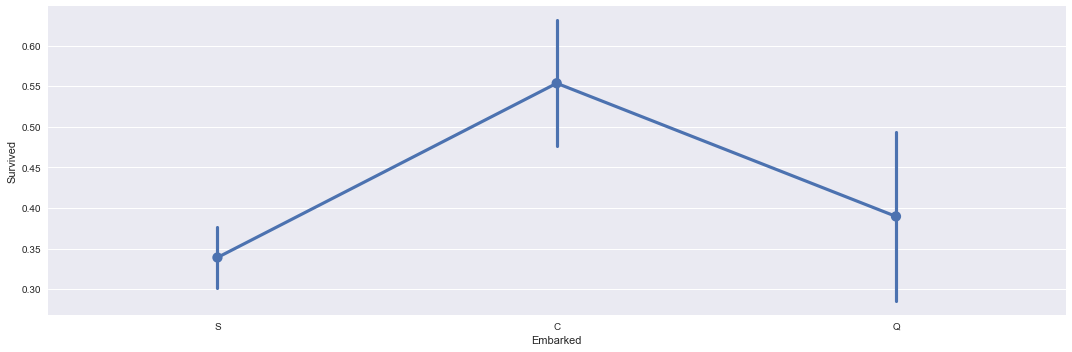

In [13]:
%matplotlib inline
sns.set_style("darkgrid")
sns.factorplot('Embarked', 'Survived', data=train_data, size = 5, aspect=3)

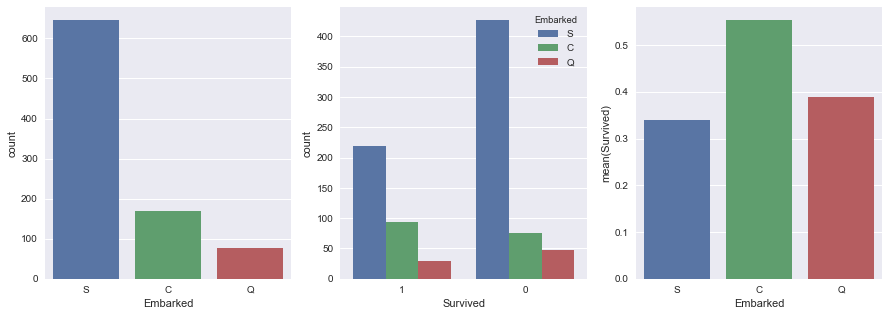

In [14]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_data, order=[1,0],ax=axis2)
embark_perc = train_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

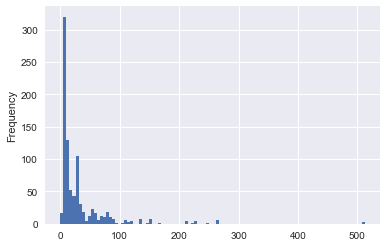

In [15]:
train_data["Fare"].plot(kind='hist',bins=100)

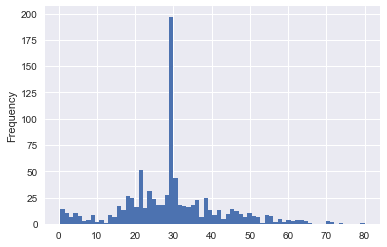

In [16]:
train_data['Age'].plot(kind='hist',bins=70)

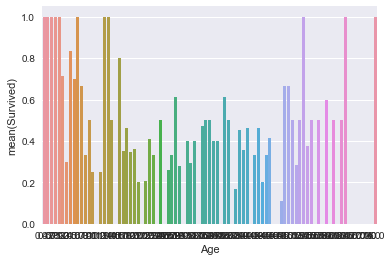

In [18]:
age_perc = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=age_perc)

- sex 분석

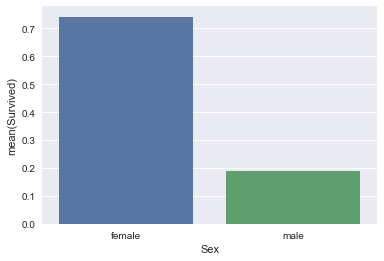

In [19]:
sex_perc = train_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=sex_perc)

In [20]:
train_data.loc[train_data["Sex"] == "male", "Sex"] = 0
train_data.loc[train_data["Sex"] == "female", "Sex"] = 1

train_data.loc[train_data["Embarked"] == "S", "Embarked"] = 0
train_data.loc[train_data["Embarked"] == "C", "Embarked"] = 1
train_data.loc[train_data["Embarked"] == "Q", "Embarked"] = 2

In [23]:
pd.to_numeric(train_data["Sex"])
pd.to_numeric(train_data["Embarked"])

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarked, dtype: int64

In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 모델링

In [25]:
new_col = ["Age", "Sex", "Embarked", "Pclass", "Fare", "SibSp", "Parch"]
x_train = train_data[new_col]
y_train = train_data["Survived"]

In [26]:
from sklearn import linear_model

# normalize와 standardize
# 정규화를 위해서는 아래를 참고
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [27]:
lm.coef_

array([ -5.92284173e-03,   5.04136478e-01,   4.14838998e-02,
        -1.75377759e-01,   3.27112091e-04,  -4.19439918e-02,
        -1.58593756e-02])

In [28]:
lm.score(x_train, y_train)

0.39772273440502459

In [29]:
test_data["Age"].isnull().sum()

86

In [30]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Age"].isnull().sum()

0

In [31]:
test_data["Embarked"].isnull().sum()

0

In [33]:
test_data.loc[test_data["Embarked"] == "S", "Embarked"] = 0
test_data.loc[test_data["Embarked"] == "C", "Embarked"] = 1
test_data.loc[test_data["Embarked"] == "Q", "Embarked"] = 2
test_data["Embarked"].isnull().sum()

0

In [34]:
test_data.loc[test_data["Sex"] == "male", "Sex"] = 0
test_data.loc[test_data["Sex"] == "female", "Sex"] = 1

In [35]:
pd.to_numeric(test_data["Sex"])
pd.to_numeric(test_data["Embarked"])

0      2
1      0
2      2
3      0
4      0
5      0
6      2
7      0
8      1
9      0
10     0
11     0
12     0
13     0
14     0
15     1
16     2
17     1
18     0
19     1
20     1
21     0
22     0
23     1
24     1
25     0
26     1
27     1
28     0
29     1
      ..
388    2
389    0
390    0
391    0
392    0
393    0
394    0
395    0
396    2
397    1
398    0
399    2
400    0
401    0
402    1
403    0
404    1
405    1
406    0
407    1
408    2
409    0
410    2
411    2
412    0
413    0
414    1
415    0
416    0
417    1
Name: Embarked, dtype: int64

In [38]:
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
x_test = test_data[new_col]

In [39]:
x_test.describe()

,Age,Pclass,Fare,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,29.599282,2.265550,35.576535,0.447368,0.392344
std,12.703770,0.841838,55.850103,0.896760,0.981429
min,0.170000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,7.895800,0.000000,0.000000
50%,27.000000,3.000000,14.454200,0.000000,0.000000
75%,35.750000,3.000000,31.471875,1.000000,0.000000
max,76.000000,3.000000,512.329200,8.000000,9.000000


In [40]:
pred = lm.predict(x_test)

In [42]:
pred = pred.round()
pred

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1., -0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  0.,  1.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  1.,  0., -0.,  1., -0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0., -0.,  1.,  1.,  0.,  1.,  1.,  0